# <center> Лабораторная работа №5
## <center> "Линейные модели, SVM и деревья решений"

**Цель лабораторной работы:** изучение линейных моделей, SVM и деревьев решений.

**Задание:**
    
    1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
    2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
    3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
    4. Обучите следующие модели:
         одну из линейных моделей;
         SVM;
         дерево решений.
    5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.


Для лабораторной работы будем использовать набор данных о медицинской страховке.

Колонки:

 - `age` - возраст
 - `sex` - пол
 - `bmi` - индекс массы тела
 - `children` - кол-во детей
 - `smoker` - курит/не курит
 - `region` - регион проживания в США
 - `charges` - плата за мед. обслуживание

In [63]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

In [64]:
# Таблица данных
data = pd.read_csv('../Dataset/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
# Размер набора данных
data.shape

(1338, 7)

In [66]:
# Типы данных в колонках
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Подготовка к анализу данных

### Проверка на пропущенные значения

In [67]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропущенных значений нет

### Основные статистические показатели для каждого параметра

In [68]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Преообразование категориальных признаков в числовые

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()
    # "sex" - пол
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
    # "smoker" - курение
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
    # "region" - регион
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [71]:
data. head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [72]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


## 1. Тестовая и обучающая выборки

Подключим необходимый метод train_test_split из библиотек sklearn для разделения выборки на тестовую и обучающую

In [73]:
from sklearn.model_selection import train_test_split

### 1.1. Разделение выборки на входные и выходные данные

 Задача регрессии будет состоять в предсказании платы за медицинское обслуживание на основании других параметров, в связи с этим следующее распределение входных и выходных параметров:

In [74]:
X = data.drop(['charges'], axis = 1)
Y = data.charges
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    age  sex     bmi  children  smoker  region
0   19    0  27.900         0       1       3
1   18    1  33.770         1       0       2
2   28    1  33.000         3       0       2
3   33    1  22.705         0       0       1
4   32    1  28.880         0       0       1 

Выходные данные:

 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


### 1.2. Разделим выборку на обучающую и тестовую

Размер тестовой выборки определим: 10%

In [75]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      age  sex    bmi  children  smoker  region
461   42    1  30.00         0       1       3
322   34    1  30.80         0       1       3
224   42    1  24.64         0       1       2
711   50    0  23.54         2       0       2
58    53    0  22.88         1       1       2 

Входные параметры тестовой выборки:

       age  sex     bmi  children  smoker  region
578    52    1  30.200         1       0       3
610    47    0  29.370         1       0       2
569    48    1  40.565         2       1       1
1034   61    1  38.380         0       0       1
198    51    0  18.050         0       0       1 

Выходные параметры обучающей выборки:

 461    22144.0320
322    35491.6400
224    19515.5416
711    10107.2206
58     23244.7902
Name: charges, dtype: float64 

Выходные параметры тестовой выборки:

 578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64


In [76]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print (round(X_test.shape[0]/(X_test.shape[0]+X_train.shape[0]), 2))

(1204, 6)
(134, 6)
(1204,)
(134,)
0.1


## 2. Линейная регрессия

### 2.1. Корреляция между признаками

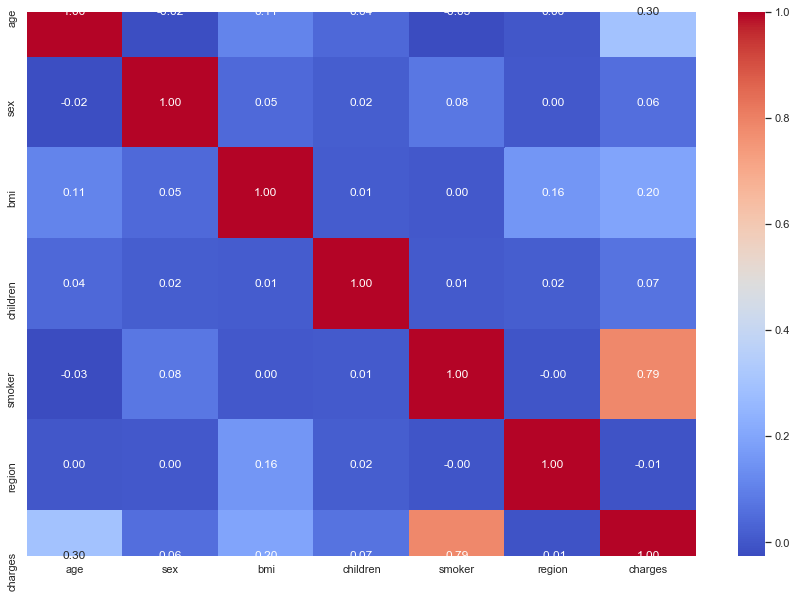

In [77]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2f')

   Наблюдается сильная корреляция между "smoker" - курением и целевым признаком. Также есть небольшая корреляция между "age" - возрастом и целевым признаком. 
   Внутри нецелевых признаков корреляция практически не наблюдается. Значит, ничто не будет мешать построению качественной модели.

### 2.2. Визуализация регрессии

Зависимость целевого признака от "age" - возраста

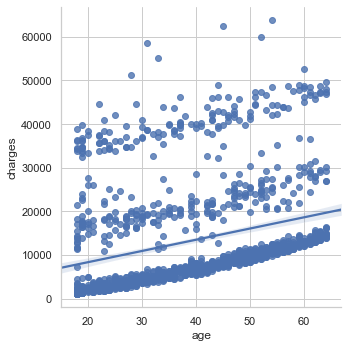

In [78]:
sns.lmplot(x = 'age',y = 'charges',data = data)

Зависимость целевого признака от "smoker" - курения

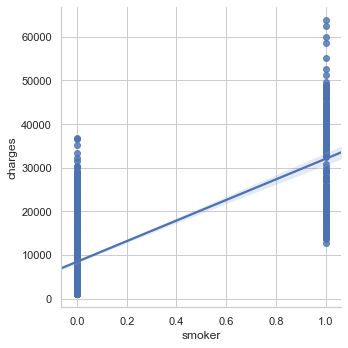

In [79]:
sns.lmplot(x='smoker',y='charges',data = data)

Данные диаграммы являются неинформативными, поэтому объединим их, использовав параметр "smoker" в качестве окраски

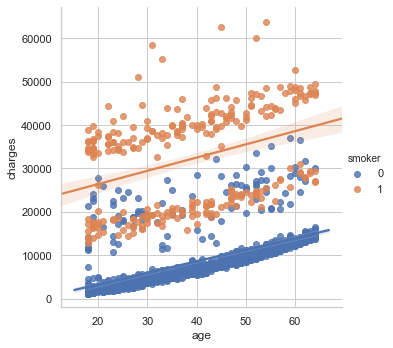

In [80]:
sns.lmplot(x = 'age',y = 'charges',hue = 'smoker',data = data)

Вывод на основе графика:
С возрастом плата за медицинское обсулживание увеличивается одинаково у курильщиков и не-курильщиков, однако плата за мед. обслуживание больше у курильщиков

### 2.3. Построение линейной регрессии

Подключим необходимые классы из библиотек sklearn для построения линейной регрессии

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [82]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

In [83]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, lr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 4255.476068832503
Средняя квадратичная ошибка: 34603420.08617241
Median absolute error: 2439.03623734741
Коэффициент детерминации: 0.8215430369031267


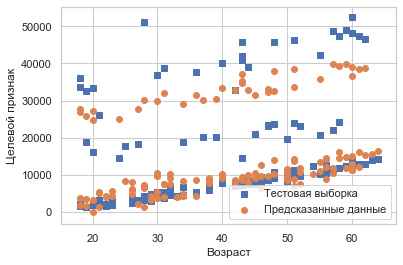

In [84]:
plt.scatter(X_test.age, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.age, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Возраст')
plt.ylabel ('Целевой признак')
plt.show()

Обучение далеко не идеальное, но все равно достаточно неплохое. Особенно если рассматривать некурящих людей

### 2.4. Полиномиальная регрессия

Подключим необходимый класс PolynomialFeatures из библиотек sklearn для построения полиномиальной регрессии

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
X = data.drop(['charges'], axis = 1)
Y = data.charges

poly = PolynomialFeatures (degree = 2)

X_quad = poly.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_quad, Y, random_state=0, test_size = 0.1)

poly_Lin_Reg = LinearRegression().fit(X_train,Y_train)

poly_y_pred = poly_Lin_Reg.predict(X_test)

In [87]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, poly_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, poly_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, poly_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, poly_y_pred))

Средняя абсолютная ошибка: 3725.5024854477615
Средняя квадратичная ошибка: 30370296.43380707
Median absolute error: 2809.0498749999997
Коэффициент детерминации: 0.8433741272847544


В данном случае график построить не удается, так как значения тестовой выборки не соответствуют значениям из основного набора

## 3. Метод опорных векторов

### 3.1. Полиномиальный регрессор

Подключим необходимый класс SVR из библиотек sklearn для полиноминального регрессора

In [88]:
from sklearn.svm import SVR

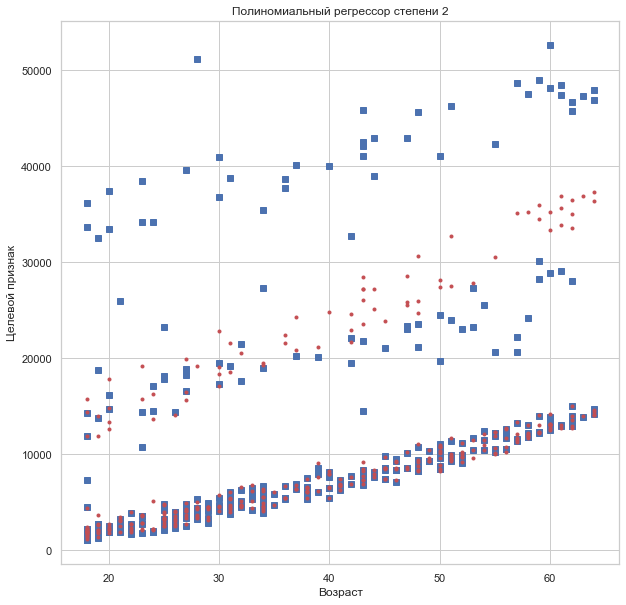

In [89]:
X = data.drop(['charges'], axis = 1)
Y = data.charges
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

polySVR = SVR(kernel='poly', degree=2, gamma=0.2, C=1.0)
polySVR.fit(X_train, Y_train)
svr_y_pred = polySVR.predict(X_test)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Полиномиальный регрессор степени 2')
ax.plot(X_test.age, Y_test, 'bs')
ax.plot(X_test.age, svr_y_pred, 'r.')
ax.set_xlabel('Возраст')
ax.set_ylabel('Целевой признак')
plt.show()

In [90]:
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, svr_y_pred))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, svr_y_pred))
print('Median absolute error:',median_absolute_error(Y_test, svr_y_pred))
print('Коэффициент детерминации:',r2_score(Y_test, svr_y_pred))

Средняя абсолютная ошибка: 3149.0234805327673
Средняя квадратичная ошибка: 46508573.89319307
Median absolute error: 152.70253406748088
Коэффициент детерминации: 0.7045846360572994


На нижнем скоплении точек, которое практически полностью соответствует некурящим людям, поведение предсказанных значений оказалось практически полностью идентичным, в отличие от поведения предсказанных значений на линейной регрессии.

Из-за особенностей распределения точек в выборке данных, а точнее из-за их "кучного" разброса, сложно построить точную модель предсказаний.

В результате можно отметить, что если человек курит, то достаточно точно данная модель может предсказать стоимость его медицинской страховки

### 3.2. Масштабирование

Попробуем масштабировать наш набор данных, чтобы сделать все признаки "равноценными"

Подключим необходимый класс MinMaxScaler из библиотек sklearn для масштабирования

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
x_columns = ['age','sex','bmi','children','smoker','region']

# Масштабирование данных в диапазоне от 0 до 1
sc = MinMaxScaler()
sc_data = sc.fit_transform(data[x_columns])
sc_data[:10]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.66666667],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.66666667],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.33333333],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.33333333],
       [0.2826087 , 0.        , 0.26311542, 0.        , 0.        ,
        0.66666667],
       [0.60869565, 0.        , 0.47027172, 0.2       , 0.        ,
        0.66666667],
       [0.41304348, 0.        , 0.31692225, 0.6       , 0.        ,
        0.33333333],
       [0.41304348, 1.        , 0.37315039, 0.4       , 0.        ,
        0.        ],
       [0.91304348, 0.        , 0.26580576, 0.        , 0.        ,
        0.33333333]])

In [93]:
X_train_sc, X_test_sc, Y_train_sc, Y_test_sc = train_test_split(sc_data, data['charges'], test_size=0.1, random_state=1)

X_train_sc.shape, X_test_sc.shape

((1204, 6), (134, 6))

In [94]:
SVR_sc = SVR(gamma = 'scale')
SVR_sc.fit(X_train_sc, Y_train_sc)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [95]:
svr_y_pred_sc = SVR_sc.predict(X_test_sc)

print('Средняя абсолютная ошибка:',   mean_absolute_error   (Y_test_sc, svr_y_pred_sc))
print('Средняя квадратичная ошибка:', mean_squared_error    (Y_test_sc, svr_y_pred_sc))
print('Median absolute error:',       median_absolute_error (Y_test_sc, svr_y_pred_sc))
print('Коэффициент детерминации:',    r2_score              (Y_test_sc, svr_y_pred_sc))

Средняя абсолютная ошибка: 8798.456564585225
Средняя квадратичная ошибка: 187447052.2001801
Median absolute error: 5063.42570007323
Коэффициент детерминации: -0.18619549286329917


Показатели сильно ухудшились...

## 4. Дерево решений

Подключим необходимые классы DecisionTreeRegressor и GridSearchCV из библиотек sklearn для мпостроения дерева решений

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [97]:
params = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [0.04, 0.06, 0.08, 0.1],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

In [98]:
%%time
grid_1 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1), param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_1.fit(data.drop(['charges'], axis=1), data['charges'])

Wall time: 23.6 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 0.1]},
             pre_dispatch

In [99]:
%%time
grid_2 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1), param_grid=params, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_2.fit(data.drop(['charges'], axis=1), data['charges'])

Wall time: 879 ms


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 0.1]},
             pre_dispatch

In [100]:
print('Лучший показатель средней абсолютной ошибки:', -grid_1.best_score_)
print('Параметры для данного показателя:\n',          grid_1.best_params_)

Лучший показатель средней абсолютной ошибки: 2883.9902213751066
Параметры для данного показателя:
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04}


In [101]:
print('Лучший показатель средней квадратичной ошибки:',-grid_2.best_score_)
print('Параметры для данного показателя:\n',grid_2.best_params_)

Лучший показатель средней квадратичной ошибки: 23280508.96381089
Параметры для данного показателя:
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04}


Данное дерево решений также дает плохие показатели оценок точности обучения..